In [ ]:
import sys
import cv2
import os
from sys import platform
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dir_path = '/root/final/main'     #这个dir后面似乎就没用了
sys.path.append('/root/final/main')
sys.path.append('/usr/local/python/openpose') #这是干啥的
from openpose import *

In [ ]:
params = dict()
params["logging_level"] = 3
params["output_resolution"] = "-1x-1"
params["net_resolution"] = "-1x368"
params["model_pose"] = "BODY_25"
params["alpha_pose"] = 0.6
params["scale_gap"] = 0.25
params["scale_number"] = 1
params["render_threshold"] = 0.05
# If GPU version is built, and multiple GPUs are available, set the ID here
params["num_gpu"] = 1
params["num_gpu_start"] = 0
params["disable_blending"] = False
# Ensure you point to the correct path where models are located
params["default_model_folder"] = "/root/final/openpose/models/"
# Construct OpenPose object allocates GPU memory
openpose = OpenPose(params)

In [ ]:
#test_video1
test1 = "barbell_curls_true"
test2 = "barbell_curls_wrong"
test3 = "dumbbell_lateral_raise_true"
test4 = "dumbbell_lateral_raise_wrong"
test5 = "dumbbell_lateral_raise_whole_true"
test6 = "dumbbell_lateral_raise_whole_wrong1"
test7 = "dumbbell_lateral_raise_whole_wrong2"
test8 = "dumbbell_rowing_true"
test9 = "dumbbell_rowing_wrong"
test10 = "rope_down_true"
test11 = "rope_down_wrong"
test12 = "squat_true"
test13 = "squat_wrong"

#test_video2
test14 = "barbell_curls_test1"
test15 = "barbell_curls_test2" 
test16 = "barbell_curls_test3"
test17 = "dumbbell_lateral_raise_test1"
test18 = "dumbbell_lateral_raise_test2"
test19 = "dumbbell_lateral_raise_test3"
test20 = "dumbbell_rowing_test"
test21 = "squat_test1"
test22 = "squat_test2"


# the path of the video
input_path = "/root/final/main/test_video/test_video1/" # for test_video1
#!!if you want to use videos in test_video2, comment the above line and use the following one
#input_path = "/root/final/main/test_video/test_video2/" #for test_video2

input_video = test5  # 推荐3,4,5,6,7,17,18,19
input_type = ".mp4"
cap = cv2.VideoCapture(input_path+input_video+input_type)
# create the output folder
folder = os.path.exists("output_video/"+ input_video) 
if not folder:                  
    os.makedirs("output_video/"+ input_video) 
    
def get_angle(vec1,vec2):
    # return the angle of vector one to vector two in clockwise direction
    #vec1 and vec2 are list
    x = np.array(vec1)
    y = np.array(vec2)
    #lenth
    Lx = np.sqrt(x.dot(x))
    Ly = np.sqrt(y.dot(y))
    cos_angle = x.dot(y)/(Lx*Ly)
    if cos_angle > 1:
        cos_angle = 1
    angle = np.arccos(cos_angle)
    angle2 = angle*360/2/np.pi
    crossdd = np.cross(x,y)
    if (crossdd <= 0):
        return -angle2
    else:
        return angle2

count = 0
Langle = []
Rangle = []
feet_distance=[]
Lhorizon_angle =[]
Rhorizon_angle =[]
index_count = []
#开始逐帧存储所需要的数据
while(cap.isOpened()):
    ret, frame = cap.read()  
    if frame is None:
        break;
    # shift the image
    frame=cv2.transpose(frame)
    frame=cv2.flip(frame,1)
    #return the keypoints and rendered output images
    keypoints, output_image = openpose.forward(frame, True)
    # Print the human pose keypoints, i.e., a [#people x #keypoints x 3]-dimensional numpy object with the keypoints of all the people on that image

    x2=keypoints[0][2][0]
    y2=keypoints[0][2][1]
    x5=keypoints[0][5][0]
    y5=keypoints[0][5][1]
    x11=keypoints[0][11][0]
    y11=keypoints[0][11][1]
    x14=keypoints[0][14][0]
    y14=keypoints[0][14][1]
    # compute the feet distance and the shoulder distance
    
    #gain the right hand angle
    L52 = [x2-x5,y2-y5]
    L23 = list(keypoints[0][3][0:2]-keypoints[0][2][0:2])
    Langle.append(get_angle(L52,L23))

    #gain the left hand angle
    R25 = [x5-x2,y5-y2]
    R56 = list(keypoints[0][6][0:2]-keypoints[0][5][0:2])
    Rangle.append(-get_angle(R25,R56))
    
    
    #gain the angle bewteen right arms
    L34 = list(keypoints[0][4][0:2]-keypoints[0][3][0:2])
    Lhorizon_angle.append(get_angle(L34,L23))  
    #gain the angle bewteen left arms
    R67 = list(keypoints[0][7][0:2]-keypoints[0][6][0:2])
    Rhorizon_angle.append(get_angle(R67,R56))
    
    
    #store the feet distance
    d1=np.sqrt((x2-x5)**2+(y2-y5)**2)
    d2=np.sqrt((x11-x14)**2+(y11-y14)**2)
    feet_distance.append(d2-d1)
    
    # store the image
    temp_name = str(count)
    while(len(temp_name)!=4):
        temp_name = "0"+temp_name
    store_name = "output_video/"+ input_video + "/" + temp_name+".jpg"
    index_count.append(store_name)
    #print(store_name)
    cv2.imwrite(store_name, output_image);
    count+=1
#print(count)

In [ ]:
plt.plot(Langle,'bo')
plt.ylabel('Right upper arm vs. Shoulder line')
plt.xlabel('degree with time')
plt.show()

plt.plot(Rangle,'bo')
plt.ylabel('Left upper arm vs. Shoulder line')
plt.xlabel('degree with time')
plt.show()

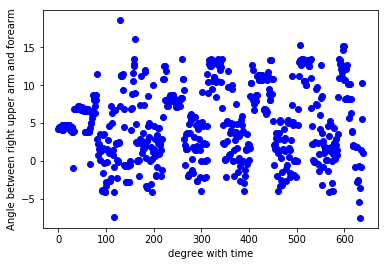

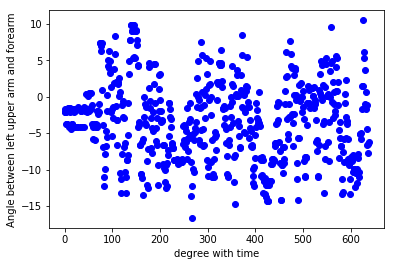

In [6]:
plt.plot(Lhorizon_angle,'bo')
plt.ylabel('Angle between right upper arm and forearm')
plt.xlabel('degree with time')
plt.show()

plt.plot(Rhorizon_angle,'bo')
plt.ylabel('Angle between left upper arm and forearm')
plt.xlabel('degree with time')
plt.show()

In [6]:
#print(feet_distance)
#img = cv2.imread(index_count[207]);
#plt.imshow(img)
#plt.show()

In [7]:
# try to deal with each action seperately
feedbacks = []
seperate_point = []


####
# to store the frame of wrong action
feedbacks_image = []
####


import peakutils
aa= -np.array(Langle)
seperate_points = peakutils.indexes(aa, min_dist=100)
print('seperating points are:', seperate_points)

for index_x in range(0,len(seperate_points)-1):
    print(index_x)
    feedback_temp = ['None','None','None','None','None','None']
    feedback_image_temp = ['None','None','None','None','None','None']
    
    test_Langle = Langle[ seperate_points[index_x] :  seperate_points[index_x+1]]
    test_Rangle = Rangle[ seperate_points[index_x] :  seperate_points[index_x+1]]
    test_Lhorizon_angle = Lhorizon_angle[ seperate_points[index_x] :  seperate_points[index_x+1]]
    test_Rhorizon_angle = Rhorizon_angle[ seperate_points[index_x] :  seperate_points[index_x+1]]
    test_feet_distance = feet_distance[ seperate_points[index_x] :  seperate_points[index_x+1] ]
    time = (seperate_points[index_x+1] - seperate_points[index_x])/60
    #first module
    max_Langle = max(test_Langle)
    max_index = Langle.index(max_Langle)
    if max_Langle > 10:
        feedback_temp[0]=("Don't let your right elbow higher than your shoulder!")
        feedback_image_temp[0]=index_count[max_index]
        
    max_Rangle = max(test_Rangle)
    max_index = Rangle.index(max_Rangle)
    if max_Rangle > 10:
        feedback_temp[1]=("Don't let your left elbow higher than your shoulder!")
        feedback_image_temp[1]=index_count[max_index]
    
    #second module
    for id in range(0,len(test_Lhorizon_angle)):
        if test_Lhorizon_angle[id] > 20:
            feedback_temp[2]=("Keep your right arm straight, around 160 degrees!")
            index = Lhorizon_angle.index(test_Lhorizon_angle[id])
            feedback_image_temp[2]=index_count[index]
            break
    
    for id in range(0,len(test_Rhorizon_angle)):
        if test_Rhorizon_angle[id] > 20:
            feedback_temp[3]=("Keep your left arm straight, around 160 degrees!")
            index = Rhorizon_angle.index(test_Rhorizon_angle[id])
            feedback_image_temp[3]=index_count[index]
            break
            
    # third module
    for id in range(0,len(test_feet_distance)):
        if test_feet_distance[id] > 60:
            feedback_temp[4]=("God, I can almost build a Great Wall between your legs")
            index = feet_distance.index(test_feet_distance[id])
            feedback_image_temp[4]=index_count[index]
            break
        elif test_feet_distance[id] > 40 :
            feedback_temp[4]=("em.....Your legs are too open!")
            index = feet_distance.index(test_feet_distance[id])
            feedback_image_temp[4]=index_count[index]
            break
        elif test_feet_distance[id] > 20:
            feedback_temp[4]=("Good job, but it would be better if you close your legs a little bit.")
            index = feet_distance.index(test_feet_distance[id])
            feedback_image_temp[4]=index_count[index]
            break
        elif -test_feet_distance[id] > 60:
            feedback_temp[4]=("Are you feet stuck with glue?")
            index = feet_distance.index(test_feet_distance[id])
            feedback_image_temp[4]=index_count[index]
            break
        elif -test_feet_distance[id] > 40:
            feedback_temp[4]=("nonono, your legs are too close!")
            index = feet_distance.index(test_feet_distance[id])
            feedback_image_temp[4]=index_count[index]
            break
        elif -test_feet_distance[id] > 20:
            feedback_temp[4]=("Not bad, you can open your feet a little bit more.")
            index = feet_distance.index(test_feet_distance[id])
            feedback_image_temp[4]=index_count[index]
            break
        else:
            continue
    #third module        
    if time < 2.5:
        feedback_temp[5] = "Too fast!" 
            
    feedbacks.append(feedback_temp)
    feedbacks_image.append(feedback_image_temp)   

seperating points are: [ 66 243 436 627]
0
1
2


In [8]:
print(feedbacks)
print(feedbacks_image)

[["Don't let your right elbow higher than your shoulder!", "Don't let your left elbow higher than your shoulder!", 'None', 'None', 'None', 'None'], ["Don't let your right elbow higher than your shoulder!", "Don't let your left elbow higher than your shoulder!", 'None', 'None', 'Good job, but it would be better if you close your legs a little bit.', 'None'], ["Don't let your right elbow higher than your shoulder!", "Don't let your left elbow higher than your shoulder!", 'None', 'None', 'None', 'None']]
[['output_video/dumbbell_lateral_raise_whole_true/0156.jpg', 'output_video/dumbbell_lateral_raise_whole_true/0129.jpg', 'None', 'None', 'None', 'None'], ['output_video/dumbbell_lateral_raise_whole_true/0327.jpg', 'output_video/dumbbell_lateral_raise_whole_true/0310.jpg', 'None', 'None', 'output_video/dumbbell_lateral_raise_whole_true/0386.jpg', 'None'], ['output_video/dumbbell_lateral_raise_whole_true/0526.jpg', 'output_video/dumbbell_lateral_raise_whole_true/0502.jpg', 'None', 'None', 'N

In the 1 turn, you have several problems:
 Don't let your right elbow higher than your shoulder!


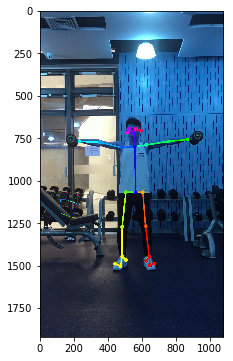

 Don't let your left elbow higher than your shoulder!


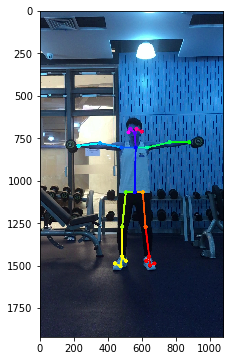

~~~~~~~~~~~~~~~~~~~~~~
In the 2 turn, you have several problems:
 Don't let your right elbow higher than your shoulder!


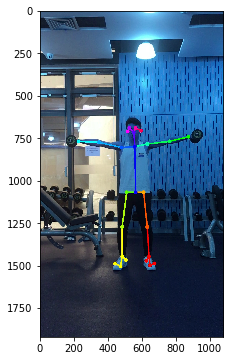

 Don't let your left elbow higher than your shoulder!


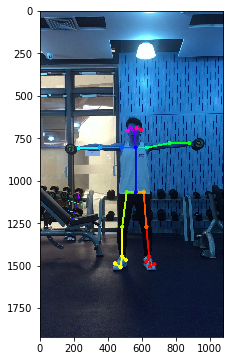

 Good job, but it would be better if you close your legs a little bit.


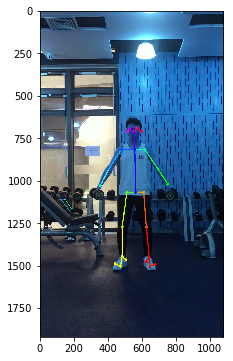

~~~~~~~~~~~~~~~~~~~~~~
In the 3 turn, you have several problems:
 Don't let your right elbow higher than your shoulder!


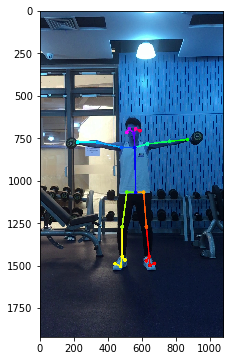

 Don't let your left elbow higher than your shoulder!


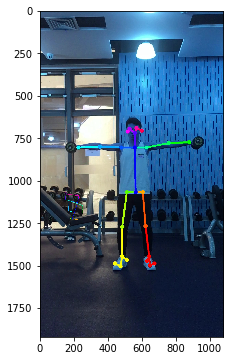

~~~~~~~~~~~~~~~~~~~~~~


In [9]:
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 6.0)
for each_x in range(len(seperate_points)-1):
    print("In the "+ str(each_x+1) +" turn, you have several problems:")
    feedback = feedbacks[each_x]
    image_part = feedbacks_image[each_x]
    if feedback == feedback_temp == ['None','None','None','None','None','None']:
        print('Good Jobs!!!!!')
    else:
        for each_y in range(len(feedback)):
            if feedback[each_y] != 'None':
                
                if image_part[each_y] != 'None':
                    print('\033[1;35m',feedback[each_y])
                    #print(image_part[each_y])
                    
                    img = cv2.imread(image_part[each_y]);
                    plt.imshow(img)
                    plt.show()
                else:
                    print(feedback[each_y])

    print('~~~~~~~~~~~~~~~~~~~~~~')

In [ ]:
print()